In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [352]:
# load in data to a dataframe
#https://www.kaggle.com/datasets/samithsachidanandan/average-monthly-surface-temperature-1940-2024
df_temp = pd.read_csv("average-monthly-surface-temperature.csv")
# https://www.kaggle.com/datasets/ucsandiego/carbon-dioxide
df_co2 = pd.read_csv("CO2 Observations.csv")

In [285]:
# preview data - temperature
df_temp.head()

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695


In [287]:
# preview data - CO2
df_co2.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


In [194]:
# check column names and data types - temp
df_temp.info()
# no missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 6 columns):
Entity                           198900 non-null object
Code                             198900 non-null object
year                             198900 non-null int64
Day                              198900 non-null object
Average surface temperature      198900 non-null float64
Average surface temperature.1    198900 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.1+ MB


In [196]:
# check column names and data types - CO2
df_co2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
Year                                 720 non-null int64
Month                                720 non-null int64
Decimal Date                         720 non-null float64
Carbon Dioxide (ppm)                 703 non-null float64
Seasonally Adjusted CO2 (ppm)        703 non-null float64
Carbon Dioxide Fit (ppm)             707 non-null float64
Seasonally Adjusted CO2 Fit (ppm)    707 non-null float64
dtypes: float64(5), int64(2)
memory usage: 39.5 KB


In [354]:
# check day in proper format - Temp
df_temp['Date'] = pd.to_datetime(df_temp['Day'])
df_temp['Month'] = df_temp['Date'].dt.month 
# Set date as the index
df_temp.set_index('Date', inplace=True)  
df_temp = df_temp.drop(columns=["Day"])
# Average surface temperature = Daily Average surface temperature
df_temp.rename(columns={'Average surface temperature': 'Daily Average surface temperature'}, inplace=True)
# Average surface temperature.1 = Monthly Average surface temperature
df_temp.rename(columns={'Average surface temperature.1': 'Monthly Average surface temperature'}, inplace=True)
df_temp.rename(columns={'year': 'Year'}, inplace=True)

In [291]:
df_temp["Entity"].nunique()
# 195 entities in dataset 

195

In [356]:
# Function to convert decimal year to yyyy-mm-dd format
def decimal_year_to_date(decimal_year):
    year = int(decimal_year)  # Extract integer part as year
    days = (decimal_year - year) * 365.25  # Convert fraction to days
    date = pd.to_datetime(f"{year}-01-01") + pd.to_timedelta(days, unit="D")  # Add days to Jan 1st
    return date.strftime("%Y-%m-%d")  # Convert to string in yyyy-mm-dd format


In [358]:
df_co2["Date"] = df_co2["Decimal Date"].apply(decimal_year_to_date)
df_co2['Date'] = pd.to_datetime(df_co2['Date'])
# Set date as the index
df_co2.set_index('Date', inplace=True)  

In [297]:
# temperature
df_temp.head()

,Entity,Code,year,Daily Average surface temperature,Monthly Average surface temperature,Month
Date,,,,,,
1940-01-15,Afghanistan,AFG,1940,-2.032494,11.327695,1
1940-02-15,Afghanistan,AFG,1940,-0.733503,11.327695,2
1940-03-15,Afghanistan,AFG,1940,1.999134,11.327695,3
1940-04-15,Afghanistan,AFG,1940,10.199754,11.327695,4
1940-05-15,Afghanistan,AFG,1940,17.942135,11.327695,5


In [299]:
# CO2
df_co2.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
Date,,,,,,,
1958-01-16,1958,1,1958.0411,NaN,NaN,NaN,NaN
1958-02-16,1958,2,1958.1260,NaN,NaN,NaN,NaN
1958-03-16,1958,3,1958.2027,315.69,314.42,316.18,314.89
1958-04-16,1958,4,1958.2877,317.45,315.15,317.30,314.98
1958-05-16,1958,5,1958.3699,317.50,314.73,317.83,315.06


In [211]:
# look at basic statistics - temp
df_temp.describe()

,year,Daily Average surface temperature,Monthly Average surface temperature,Month
count,198900.00000,198900.000000,198900.000000,198900.000000
mean,1982.00000,18.072073,18.072073,6.500000
std,24.53575,10.246142,8.710114,3.452061
min,1940.00000,-36.240032,-21.529121,1.000000
25%,1961.00000,12.304079,10.569263,3.750000
50%,1982.00000,22.055794,21.856285,6.500000
75%,2003.00000,25.317015,25.142885,9.250000
max,2024.00000,39.889374,29.794220,12.000000


In [212]:
# look at basic statistics - CO2
df_co2.describe()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
count,720.000000,720.000000,720.000000,703.000000,703.000000,707.000000,707.000000
mean,1987.500000,6.500000,1987.997492,352.375633,352.375206,352.054074,352.049830
std,17.330141,3.454452,17.332539,26.241884,26.171620,26.241431,26.178904
min,1958.000000,1.000000,1958.041100,313.210000,314.420000,312.450000,314.890000
25%,1972.750000,3.750000,1973.019900,328.555000,329.010000,328.340000,328.400000
50%,1987.500000,6.500000,1987.998600,349.800000,349.820000,349.370000,349.270000
75%,2002.250000,9.250000,2002.977425,373.195000,372.935000,372.840000,372.605000
max,2017.000000,12.000000,2017.956200,407.650000,406.040000,407.280000,405.830000


In [216]:
# find the range of the dataset - temp
df_temp.index.min(), df_temp.index.max()

(Timestamp('1940-01-15 00:00:00'), Timestamp('2024-12-15 00:00:00'))

In [218]:
# find the range of the dataset - CO2
df_co2.index.min(), df_co2.index.max()

(Timestamp('1958-01-16 00:00:00'), Timestamp('2017-12-16 00:00:00'))

In [119]:
12*(2024-1940)

1008

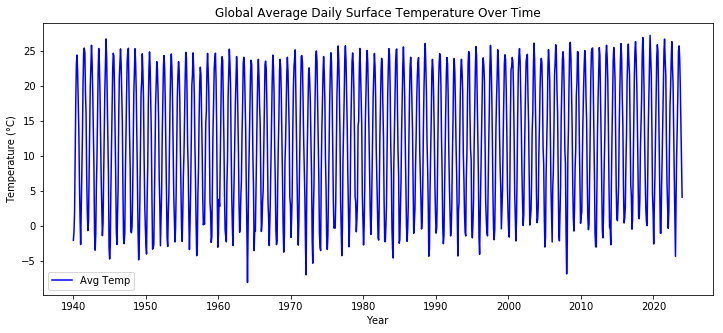

In [121]:
# temperate trend over time 
plt.figure(figsize=(12, 5))
plt.plot(df.index[:1008], df['Daily Average surface temperature'][:1008], color='b', label='Avg Temp')
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Global Average Daily Surface Temperature Over Time")
plt.legend()
plt.show()

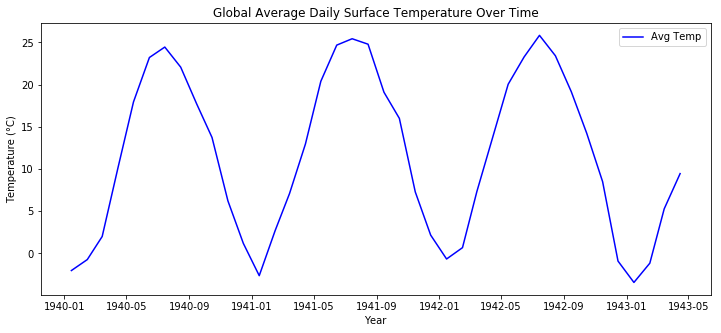

In [123]:
# temperate trend over time 
plt.figure(figsize=(12, 5))
plt.plot(df.index[:40], df['Daily Average surface temperature'][:40], color='b', label='Avg Temp')
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Global Average Daily Surface Temperature Over Time")
plt.legend()
plt.show()

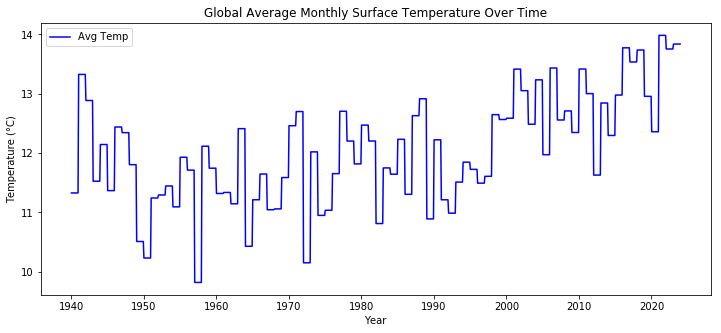

In [127]:
# temperate trend over time 
plt.figure(figsize=(12, 5))
plt.plot(df.index[:1008], df['Monthly Average surface temperature'][:1008], color='b', label='Avg Temp')
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Global Average Monthly Surface Temperature Over Time")
plt.legend()
plt.show()

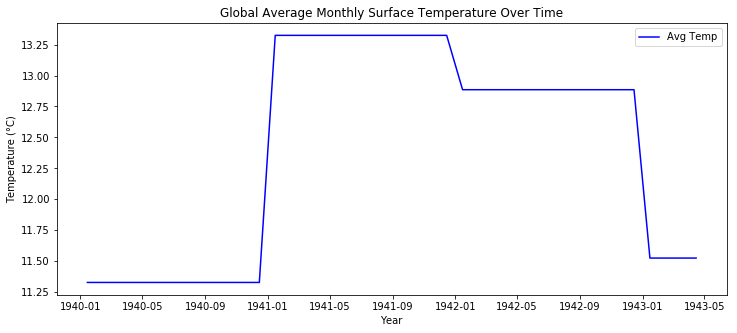

In [129]:
# temperate trend over time 
plt.figure(figsize=(12, 5))
plt.plot(df.index[:40], df['Monthly Average surface temperature'][:40], color='b', label='Avg Temp')
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Global Average Monthly Surface Temperature Over Time")
plt.legend()
plt.show()

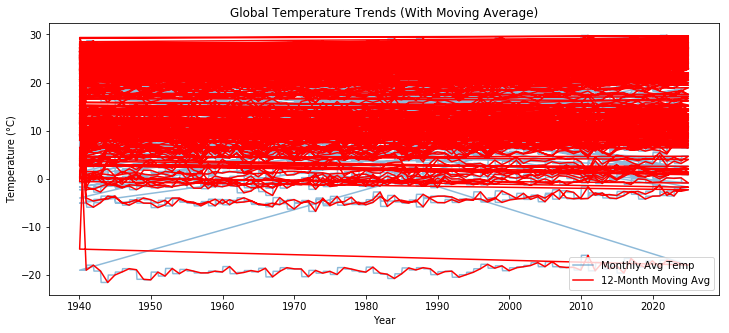

In [97]:
# apply a rolling mean to smooth out fluctuations 
df['temperature_ma'] = df['Monthly Average surface temperature'].rolling(window=12).mean()

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Monthly Average surface temperature'], label='Monthly Avg Temp', alpha=0.5)
plt.plot(df.index, df['temperature_ma'], label='12-Month Moving Avg', color='red')
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Global Temperature Trends (With Moving Average)")
plt.legend()
plt.show()

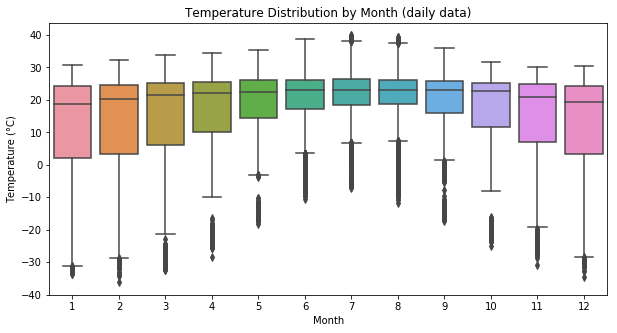

In [99]:
# check seasonal trends
df['month'] = df.index.month

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['month'], y=df['Daily Average surface temperature'])
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Distribution by Month (daily data)")
plt.show()

# to do - look at for specific countries 

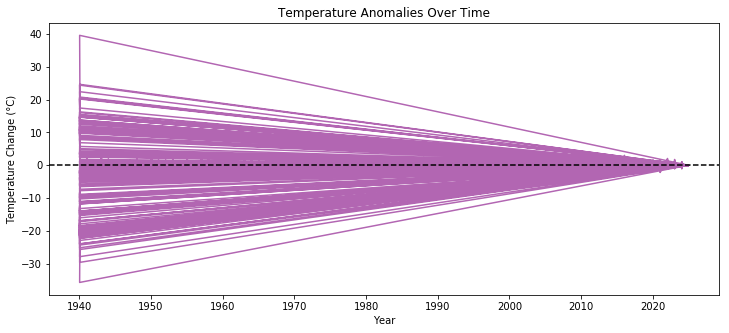

In [101]:
# temperature anomalies
df['temp_change'] = df['Monthly Average surface temperature'].diff()

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['temp_change'], color='purple', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Year")
plt.ylabel("Temperature Change (°C)")
plt.title("Temperature Anomalies Over Time")
plt.show()

In [131]:
# Plan: 
## - Split data so that it can labelled according to country 
## - Plot this data according to country 
## - Understand the rest of the plots 
## - See if there is CO2 data - calculate a correlation

/Users/kirstentempest/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


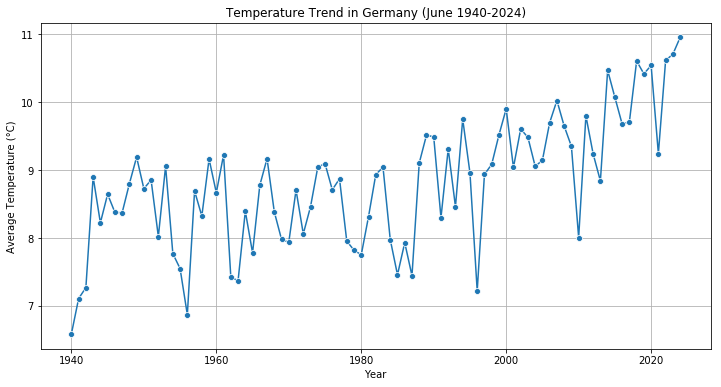

In [362]:
# Filter temperature data for Germany and the month of June
df_temp_germany = df_temp[(df_temp["Entity"] == "Germany") & (df_temp["Month"] == 6)]

# Convert 'Year' column to integer if needed
df_temp_germany["Year"] = df_temp_germany["Year"].astype(int)

# Sort values by year (for proper plotting)
df_temp_germany = df_temp_germany.sort_values("Year")

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Monthly Average surface temperature", data=df_temp_germany, marker="o", linestyle="-")

# Customizing the plot
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Temperature Trend in Germany (June 1940-2024)")
plt.grid(True)
plt.show()

In [364]:
# To find the average surface temperature trend across all countries for the month of June, you can follow these steps:
# Filter data for June (Month == 6)
df_temp_june = df_temp[df_temp["Month"] == 6]

# Group by Year and calculate the average temperature across all countries
df_avg_temp_june = df_temp_june.groupby("Year")["Daily Average surface temperature"].mean().reset_index()

df_avg_temp_june["Date"] = pd.to_datetime(df_avg_temp_june["Year"].astype(str) + '-06-01')
df_avg_temp_june.set_index('Date', inplace=True)  

In [366]:
df_avg_temp_june

,Year,Daily Average surface temperature
Date,,
1940-06-01,1940,20.991643
1941-06-01,1941,21.218018
1942-06-01,1942,21.045387
1943-06-01,1943,20.431494
1944-06-01,1944,20.986099
...,...,...
2020-06-01,2020,22.288874
2021-06-01,2021,22.460615
2022-06-01,2022,22.353668


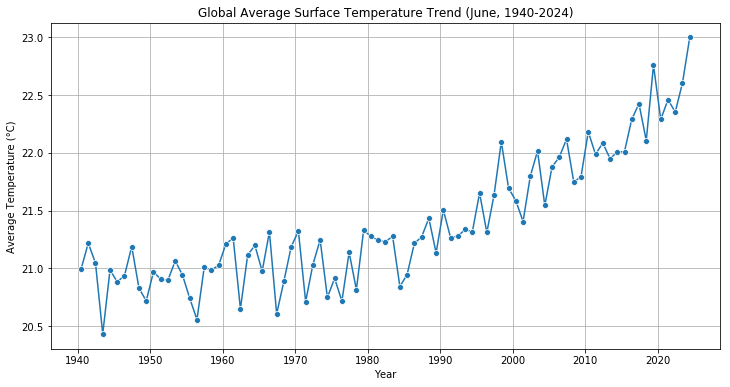

In [368]:
# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_avg_temp_june.index[:], y=df_avg_temp_june["Daily Average surface temperature"][:], marker="o", linestyle="-")

# Customizing the plot
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Global Average Surface Temperature Trend (June, 1940-2024)")
plt.grid(True)
plt.show()

In [370]:
# To find the average surface temperature trend across all countries for each month, you can follow these steps:
# Group by Year and calculate the average temperature across all countries
df_avg_temp = df_temp.groupby(["Year","Month"])["Daily Average surface temperature"].mean().reset_index()

df_avg_temp["Date"] = pd.to_datetime(df_avg_temp["Year"].astype(str) + '-' + df_avg_temp["Month"].astype(str).str.zfill(2) + '-01')
df_avg_temp.set_index('Date', inplace=True)  

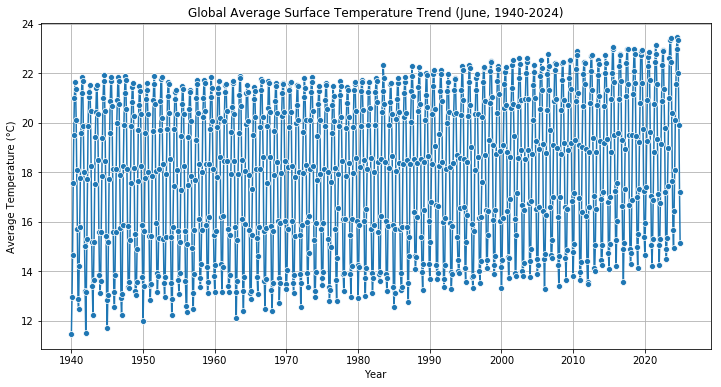

In [372]:

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_avg_temp.index[:], y=df_avg_temp["Daily Average surface temperature"][:],  marker="o", linestyle="-")

# Customizing the plot
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Global Average Surface Temperature Trend (June, 1940-2024)")
plt.grid(True)
plt.show()

In [66]:
# then import other CO2 dataset and see if there is a correlation

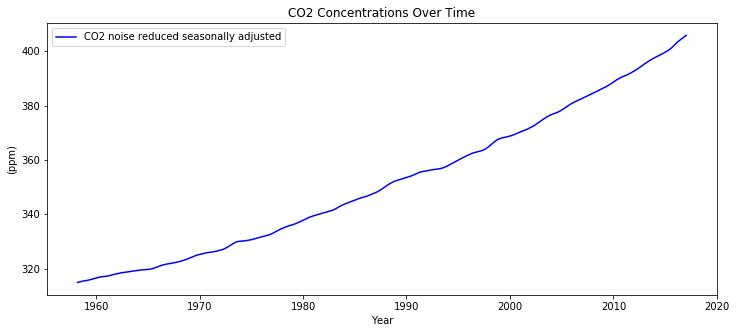

In [177]:
# CO2 trend over time 
plt.figure(figsize=(12, 5))
plt.plot(df_co2.index[:], df_co2['Seasonally Adjusted CO2 Fit (ppm)'][:], color='b', label='CO2 noise reduced seasonally adjusted')
plt.xlabel("Year")
plt.ylabel("(ppm)")
plt.title("CO2 Concentrations Over Time")
plt.legend()
plt.show()

In [346]:
df_co2

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
Date,,,,,,,
1958-01-16,1958,1,1958.0411,NaN,NaN,NaN,NaN
1958-02-16,1958,2,1958.1260,NaN,NaN,NaN,NaN
1958-03-16,1958,3,1958.2027,315.69,314.42,316.18,314.89
1958-04-16,1958,4,1958.2877,317.45,315.15,317.30,314.98
1958-05-16,1958,5,1958.3699,317.50,314.73,317.83,315.06
...,...,...,...,...,...,...,...
2017-08-16,2017,8,2017.6219,NaN,NaN,NaN,NaN
2017-09-16,2017,9,2017.7068,NaN,NaN,NaN,NaN
2017-10-16,2017,10,2017.7890,NaN,NaN,NaN,NaN


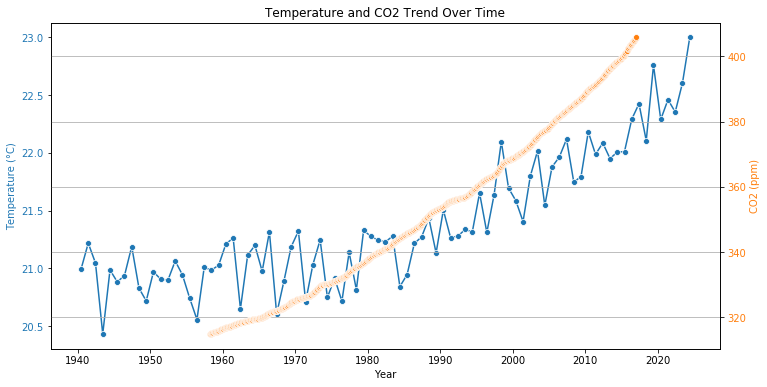

In [374]:
# plot CO2 and temp together. Same x axis, different y axis. 
# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the temperature trend (primary y-axis)
sns.lineplot(x=df_avg_temp_june.index[:], y=df_avg_temp_june["Daily Average surface temperature"][:], ax=ax1, color='tab:blue', marker="o", linestyle="-")
ax1.set_xlabel("Year")
ax1.set_ylabel("Temperature (°C)", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the secondary y-axis for CO2
ax2 = ax1.twinx()
sns.lineplot(x=df_co2.index[:], y=df_co2['Seasonally Adjusted CO2 Fit (ppm)'][:],ax=ax2, color='tab:orange', marker="o", linestyle="--")
ax2.set_ylabel("CO2 (ppm)", color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Customizing the plot
plt.title("Temperature and CO2 Trend Over Time")
plt.grid(True)

# Show the plot
plt.show()

In [344]:
correlation = df_co2["Seasonally Adjusted CO2 Fit (ppm)"].corr(df_avg_temp_june["Daily Average surface temperature"])
print(f"Correlation between CO2 and Temperature: {correlation:.4f}")

Correlation between CO2 and Temperature: nan


In [376]:
# find the overlapping time range in the datasets: 
# Find overlapping time period
start_year = max(df_avg_temp_june["Year"].min(), df_co2["Year"].min())  # Latest start year
end_year = min(df_avg_temp_june["Year"].max(), df_co2["Year"].max())  # Earliest end year

# Filter both datasets to the overlapping period
df_avg_temp_june_filtered = df_avg_temp_june[(df_avg_temp_june["Year"] >= start_year) & (df_avg_temp_june["Year"] <= end_year)]
df_co2_filtered = df_co2[(df_co2["Year"] >= start_year) & (df_co2["Year"] <= end_year)]

# Merge both datasets on 'Year'
df_merged = pd.merge(df_avg_temp_june_filtered, df_co2_filtered, on="Year")


In [378]:
df_merged

,Year,Daily Average surface temperature,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,20.984515,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,20.984515,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,20.984515,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,20.984515,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,20.984515,5,1958.3699,317.50,314.73,317.83,315.06
...,...,...,...,...,...,...,...,...
715,2017,22.425281,8,2017.6219,NaN,NaN,NaN,NaN
716,2017,22.425281,9,2017.7068,NaN,NaN,NaN,NaN
717,2017,22.425281,10,2017.7890,NaN,NaN,NaN,NaN
718,2017,22.425281,11,2017.8740,NaN,NaN,NaN,NaN


In [ ]:
correlation = df_co2["Seasonally Adjusted CO2 Fit (ppm)"].corr(df_avg_temp_june["Daily Average surface temperature"])
print(f"Correlation between CO2 and Temperature: {correlation:.4f}")